Данный файл нужен для выбора модели машинного обучения на дескрипторах.

Вход:

- data_analysis_d.csv

Выход: в результате была выбрана LGBM модель, для которой будет проведен подбор параметров и на лучших будет обучена модель

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datacon/data_analysis_d.csv')

In [4]:
df

,Unnamed: 0,Uptake,Units,Temp.,Method,Type,Sequence,"Time, h","Conc., uM",target,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,0,650.00,Mean Fluorescence intensity,23.0,1,5,RKKRRQRRR,0.250000,12.5,650.00,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,1,31.25,Mean Fluorescence intensity,23.0,1,5,RKKRRQRR,0.166667,12.5,31.25,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,2,10.00,Mean Fluorescence intensity,23.0,1,5,RKKRRQR,0.166667,12.5,10.00,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,3,22.50,Mean Fluorescence intensity,23.0,1,5,KKRRQRRR,0.166667,12.5,22.50,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,4,20.00,Mean Fluorescence intensity,23.0,1,5,KRRQRRR,0.166667,12.5,20.00,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,1161,50.00,Mean Fluorescence intensity,37.0,1,4,RHRHRHRHR,24.000000,50000.0,50.00,...,22.222,22.222,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0
1162,1162,100.00,Mean Fluorescence intensity,37.0,1,4,RRHRHRHRHR,24.000000,50000.0,100.00,...,30.000,30.000,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0
1163,1163,250.00,Mean Fluorescence intensity,37.0,1,4,RRRHRHRHRHR,24.000000,50000.0,250.00,...,36.364,36.364,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0
1164,1164,400.00,Mean Fluorescence intensity,37.0,1,4,RRRRHRHRHRHR,24.000000,50000.0,400.00,...,41.667,41.667,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0


In [5]:
df=df.drop(columns=['Unnamed: 0', 'Uptake', 'Units', 'Sequence'])
df

,Temp.,Method,Type,"Time, h","Conc., uM",target,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,23.0,1,5,0.250000,12.5,650.00,0.0,0.111,0.889,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,23.0,1,5,0.166667,12.5,31.25,0.0,0.125,0.875,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,23.0,1,5,0.166667,12.5,10.00,0.0,0.143,0.857,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,23.0,1,5,0.166667,12.5,22.50,0.0,0.125,0.875,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,23.0,1,5,0.166667,12.5,20.00,0.0,0.143,0.857,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,37.0,1,4,24.000000,50000.0,50.00,0.0,0.000,1.000,0.0,...,22.222,22.222,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0
1162,37.0,1,4,24.000000,50000.0,100.00,0.0,0.000,1.000,0.0,...,30.000,30.000,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0
1163,37.0,1,4,24.000000,50000.0,250.00,0.0,0.000,1.000,0.0,...,36.364,36.364,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0
1164,37.0,1,4,24.000000,50000.0,400.00,0.0,0.000,1.000,0.0,...,41.667,41.667,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0


In [6]:
y=df['target']
X=df.drop(columns=['target'])

In [7]:
#Блок необходим для преобразования датасета в формат, который сможет понять модель
import re
# Change columns names ([LightGBM] Do not support special JSON characters in feature name.)
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in X.columns}
new_n_list = list(new_names.values())
# [LightGBM] Feature appears more than one time.
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
X = X.rename(columns=new_names)

### Сделайте датасет Х и датасет у и просто запустите код снизу

In [8]:
def adjusted_r2_score(r2, n, p):
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

In [9]:
# @title scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
def data_prep(X, y):
  X_scaled = X.copy()
  scalers = {}  # Словарь для хранения scaler'ов для каждого столбца

  for column in X.columns:
    scaler = MinMaxScaler()
    X_scaled[column] = scaler.fit_transform(X[[column]])
    scalers[column] = scaler


  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



  return X_train, X_test, y_train, y_test

In [10]:
# @title LGBM
import lightgbm as lgb
import lightgbm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def LGBM(X_train, y_train, X_test, y_test):
    """
    Обучает модель LightGBM для регрессии и оценивает ее производительность.

    Args:
        X_train (pd.DataFrame): Обучающие данные.
        y_train (pd.Series): Целевые значения для обучающих данных.
        X_test (pd.DataFrame): Тестовые данные.
        y_test (pd.Series): Целевые значения для тестовых данных.
    """

    reg = lgb.LGBMRegressor()
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
# Cross-validation for R^2
    scores_r2 = cross_val_score(reg, X_train, y_train, cv=5)

    y_pred_train = reg.predict(X_train)

    n = len(y_train)  # Объем выборки
    p = X_train.shape[1]  # Количество признаков

    # Рассчет adjusted R-squared
    adj_r2 = adjusted_r2_score(r2, n, p)

    print('LightGBM Model MSE: {0:0.4f}'.format(mse))
    print('LightGBM Model R2 score: {0:0.4f}'.format(r2))
    print('LightGBM Model Adjusted R2 score: {0:0.4f}'.format(adj_r2))
    print('Cross-validation R^2 scores: {0}'.format(scores_r2))


    train_mse = mean_squared_error(y_train, y_pred_train)
    y_pred_train_r2 = reg.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train_r2)

    train_adj_r2 = adjusted_r2_score(train_r2, n, p)

    print('Train MSE: {0:0.4f}'.format(train_mse))
    print('Train R^2: {0:0.4f}'.format(train_r2))
    print('Train Adjusted R^2: {0:0.4f}'.format(train_adj_r2))
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    print("Test MSE:", test_mse)
    print("Test R^2:", test_r2)

    # Построение графика важности признаков
    lightgbm.plot_importance(reg, max_num_features=60, figsize=(20,20), height=0.9)
    plt.show()

    feature_importance = reg.feature_importances_

    # Нормализация значений важности признаков
    normalized_importance = feature_importance / np.sum(feature_importance)
    sorted_indices = np.argsort(normalized_importance)[::-1]  # Сортировка в порядке убывания

    # Ограничение количества значений для отображения (например, первые 10 значений)
    top_n = 25
    sorted_indices = sorted_indices[:top_n]

    # Сортировка значений и признаков
    sorted_importance = normalized_importance[sorted_indices]
    sorted_features = X_train.columns[sorted_indices]

    # Построение графика с отсортированными и ограниченными значениями важности признаков
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_importance, y=sorted_features)
    plt.xlabel('Normalized Importance')
    plt.ylabel('Features')
    plt.title('Top {} Feature Importance'.format(top_n))
    plt.show()

In [ ]:
# @title XGB
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

def XGB(X_train, y_train, X_test, y_test):
    # XGBoost model
    xgb = XGBRegressor()

    # Cross-validation
    cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation scores:", -cv_scores.mean())  # Print negative MSE as it's returned by cross_val_score
    scores_r2 = cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2')
    print('Cross-validation R^2 scores: {0}'.format(scores_r2))
    print('Cross-validation R^2: {0:0.4f}'.format(np.mean(scores_r2)))
    # Fit and predict
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    y_pred_train = xgb.predict(X_train)

    # Train metrics
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_r2 = r2_score(y_train, y_pred_train)
    print("Train RMSE:", train_rmse)
    print("Train R-squared:", train_r2)

    # Test metrics
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_r2 = r2_score(y_test, y_pred)
    print("Test RMSE:", test_rmse)
    print("Test R-squared:", test_r2)

In [ ]:
# @title RF
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

def RF(X_train, y_train, X_test, y_test):
  """
  Trains and evaluates a Random Forest Regressor model.

  Args:
    X_train: Training features.
    y_train: Training target values.
    X_test: Testing features.
    y_test: Testing target values.

  Returns:
    None. Prints training and testing metrics.
  """

  rf_regressor = RandomForestRegressor()

  rf_regressor.fit(X_train, y_train)

  y_pred = rf_regressor.predict(X_test)

  scores_r2 = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
  print('Cross-validation R^2 scores: {0}'.format(scores_r2))
  print('Cross-validation R^2: {0:0.4f}'.format(np.mean(scores_r2)))

  y_pred_train = rf_regressor.predict(X_train)
  train_mse = mean_squared_error(y_train, y_pred_train)
  train_r2 = r2_score(y_train, y_pred_train)
  print("Train MSE:", train_mse)
  print("Train R^2:", train_r2)

  test_mse = mean_squared_error(y_test, y_pred)
  test_r2 = r2_score(y_test, y_pred)
  print("Test MSE:", test_mse)
  print("Test R^2:", test_r2)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.9 MB/s eta 0:00:00


In [ ]:
# @title CatBoost
from catboost import CatBoostRegressor

def catboost(X_train, y_train, X_test, y_test):
  """
  Trains and evaluates a Random Forest Regressor model.

  Args:
    X_train: Training features.
    y_train: Training target values.
    X_test: Testing features.
    y_test: Testing target values.

  Returns:
    None. Prints training and testing metrics.
  """

  cat_regressor = CatBoostRegressor()

  cat_regressor.fit(X_train, y_train)

  y_pred = cat_regressor.predict(X_test)

  scores_r2 = cross_val_score(cat_regressor, X_train, y_train, cv=5, scoring='r2')
  print('Cross-validation R^2 scores: {0}'.format(scores_r2))
  print('Cross-validation R^2: {0:0.4f}'.format(np.mean(scores_r2)))

  y_pred_train = cat_regressor.predict(X_train)
  train_mse = mean_squared_error(y_train, y_pred_train)
  train_r2 = r2_score(y_train, y_pred_train)
  print("Train MSE:", train_mse)
  print("Train R^2:", train_r2)

  test_mse = mean_squared_error(y_test, y_pred)
  test_r2 = r2_score(y_test, y_pred)
  print("Test MSE:", test_mse)
  print("Test R^2:", test_r2)


In [ ]:
# @title SVR (rbf)
#Мы также опробовали SVR (linear) и SVR (poly), но результаты были такими же, либо хуже.
from sklearn.svm import SVR

def svr(X_train, y_train, X_test, y_test):
  """
  Trains and evaluates a Random Forest Regressor model.

  Args:
    X_train: Training features.
    y_train: Training target values.
    X_test: Testing features.
    y_test: Testing target values.

  Returns:
    None. Prints training and testing metrics.
  """

  svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

  svr_rbf.fit(X_train, y_train)

  y_pred = svr_rbf.predict(X_test)

  scores_r2 = cross_val_score(svr_rbf, X_train, y_train, cv=5, scoring='r2')
  print('Cross-validation R^2 scores: {0}'.format(scores_r2))
  print('Cross-validation R^2: {0:0.4f}'.format(np.mean(scores_r2)))

  y_pred_train = svr_rbf.predict(X_train)
  train_mse = mean_squared_error(y_train, y_pred_train)
  train_r2 = r2_score(y_train, y_pred_train)
  print("Train MSE:", train_mse)
  print("Train R^2:", train_r2)

  test_mse = mean_squared_error(y_test, y_pred)
  test_r2 = r2_score(y_test, y_pred)
  print("Test MSE:", test_mse)
  print("Test R^2:", test_r2)

In [ ]:
# @title Bagging
from sklearn.ensemble import BaggingRegressor

def bagging(X_train, y_train, X_test, y_test):

  bag = BaggingRegressor()

  bag.fit(X_train, y_train)

  y_pred = bag.predict(X_test)

  scores_r2 = cross_val_score(bag, X_train, y_train, cv=5, scoring='r2')
  print('Cross-validation R^2 scores: {0}'.format(scores_r2))
  print('Cross-validation R^2: {0:0.4f}'.format(np.mean(scores_r2)))

  y_pred_train = bag.predict(X_train)
  train_mse = mean_squared_error(y_train, y_pred_train)
  train_r2 = r2_score(y_train, y_pred_train)
  print("Train MSE:", train_mse)
  print("Train R^2:", train_r2)

  test_mse = mean_squared_error(y_test, y_pred)
  test_r2 = r2_score(y_test, y_pred)
  print("Test MSE:", test_mse)
  print("Test R^2:", test_r2)


In [ ]:
# @title Bagging
from sklearn.ensemble import BaggingRegressor

def bagging_dtr(X_train, y_train, X_test, y_test):

  bag = BaggingRegressor()

  bag.fit(X_train, y_train)

  y_pred = bag.predict(X_test)

  scores_r2 = cross_val_score(bag, X_train, y_train, cv=10, scoring='r2')
  print('Cross-validation R^2 scores: {0}'.format(scores_r2))
  print('Cross-validation R^2: {0:0.4f}'.format(np.mean(scores_r2)))

  y_pred_train = bag.predict(X_train)
  train_mse = mean_squared_error(y_train, y_pred_train)
  train_r2 = r2_score(y_train, y_pred_train)
  print("Train MSE:", train_mse)
  print("Train R^2:", train_r2)

  test_mse = mean_squared_error(y_test, y_pred)
  test_r2 = r2_score(y_test, y_pred)
  print("Test MSE:", test_mse)
  print("Test R^2:", test_r2)

In [ ]:
# @title evaluate
def evaluate(X, y):
    X_train_scaled, X_test_scaled, y_train, y_test = data_prep(X, y)
    print('LGBM')
    LGBM(X_train_scaled, y_train, X_test_scaled, y_test)
    print('XGB')
    XGB(X_train_scaled, y_train, X_test_scaled, y_test)
    print('RF')
    RF(X_train_scaled, y_train, X_test_scaled, y_test)
    print('Catboost')
    catboost(X_train_scaled, y_train, X_test_scaled, y_test)
    print('SVR')
    svr(X_train_scaled, y_train, X_test_scaled, y_test)
    print('Bagging')
    bagging(X_train_scaled, y_train, X_test_scaled, y_test)

Все метрики будут под функцией снизу

### Примечание:
1) Cat boost считается очень долго, если будут проблемы, есть смысл сделать его отдельно

2) Если скрипт в целом очень долгий, есть смысл кикнуть SVR, скорее всего с ней будут плохие метрики

3) Если у вас все время вылетает и все долго, есть смысл разбить функцию сверху (evaluate) на 6 разных подфункций, чтобы все посчитать по отдельности

4) следите за метрикой r_score_train, некоторые модели (особенно cat boost и bagging) могут переобучиться, но мы все равно перепроверим, если что

In [ ]:
evaluate(X, y)

LGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11368
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 152
[LightGBM] [Info] Start training from score 1649.178430
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10386
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 152
[LightGBM] [Info] Start training from score 1673.265607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

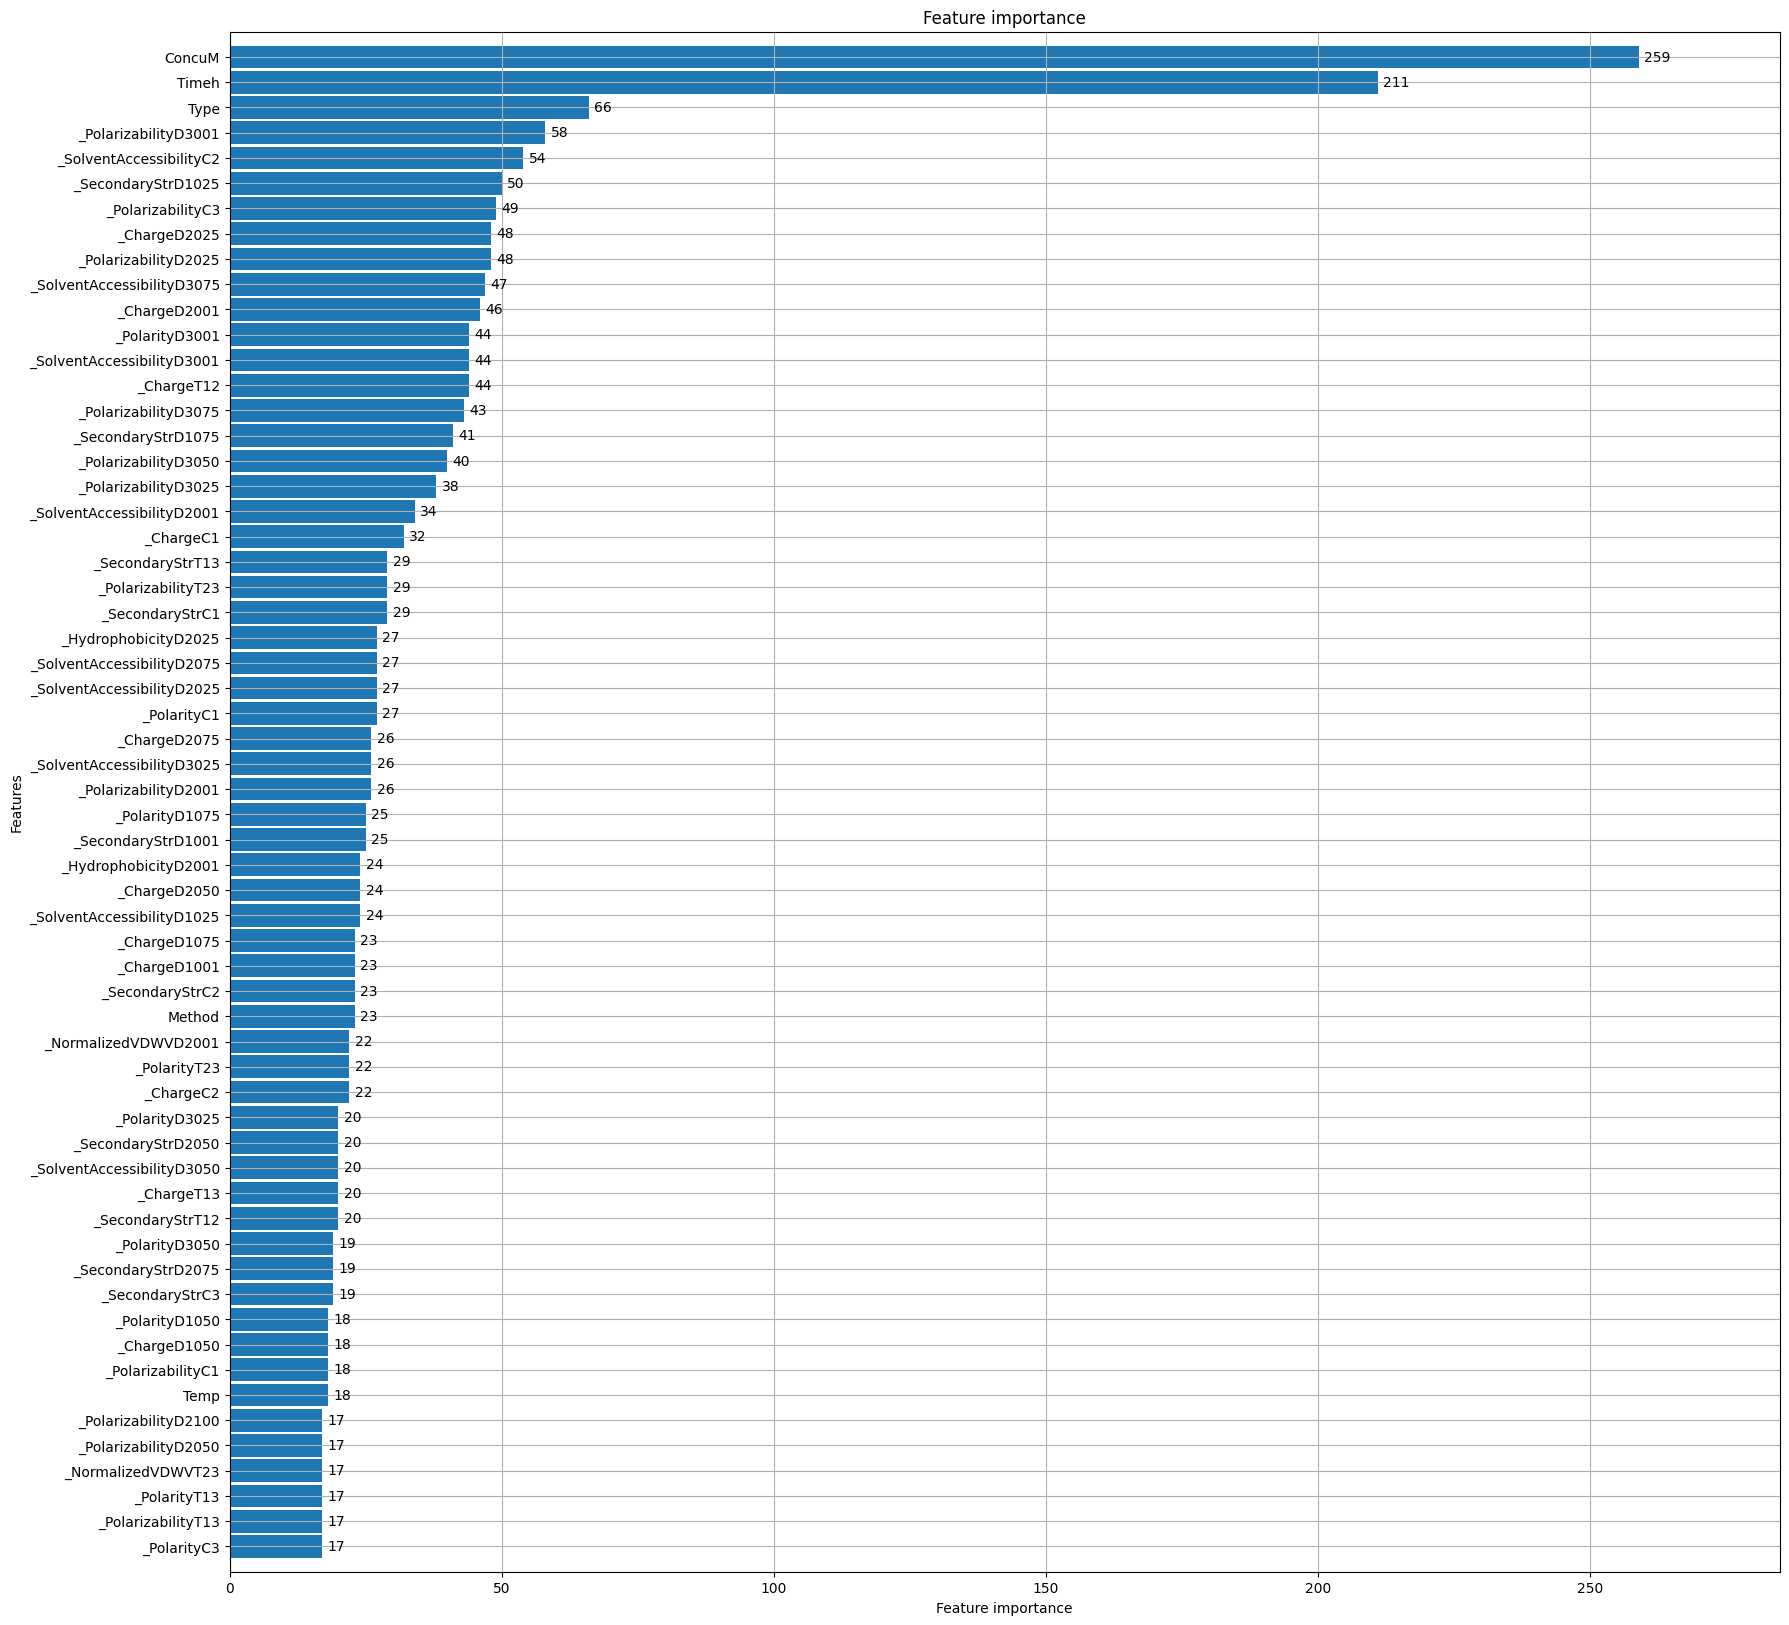

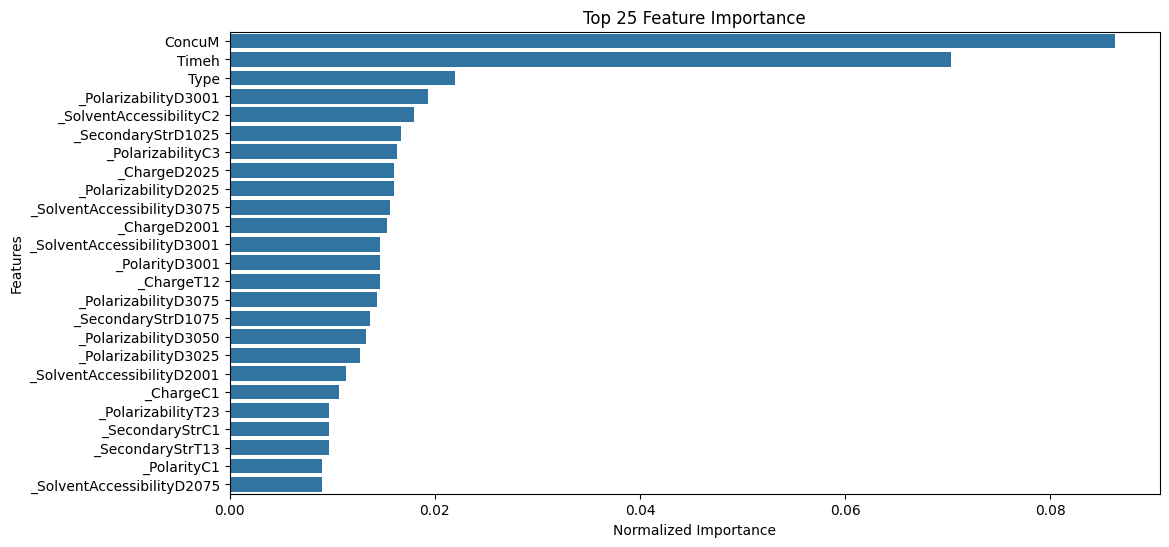

In [18]:
evaluate(X, y)